 ## Teste z para Média de Fibras Alimentares
 *Objetivo:* Verificar afirmação do fabricante (μ ≥ 4.2g)


 Configuração inicial

In [2]:
!pip install scipy matplotlib --quiet

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\carlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Parâmetros do Teste
Dados do problema:

In [3]:
mu = 4.2      # Média alegada
sigma = 1     # Desvio padrão
n = 42        # Tamanho amostral
x_bar = 3.9   # Média observada
alpha = 0.05  # Nível de significância

### Execução do Teste
 Cálculo do escore z:

In [4]:
z = (x_bar - mu)/(sigma/np.sqrt(n))

# Determinação do valor crítico
z_critico = stats.norm.ppf(alpha)

# Cálculo do valor-p
p_valor = stats.norm.cdf(z)

### Resultados Numéricos

In [5]:
print(f'''
========= Resultados =========
Estatística z: {z:.4f}
Valor crítico: {z_critico:.4f}
Valor-p: {p_valor:.4f}
Conclusão: {'Rejeitar H₀' if p_valor < alpha else 'Aceitar H₀'}
==============================
''')


========= Resultados =========
Estatística z: -1.9442
Valor crítico: -1.6449
Valor-p: 0.0259
Conclusão: Rejeitar H₀



### Visualização Gráfica

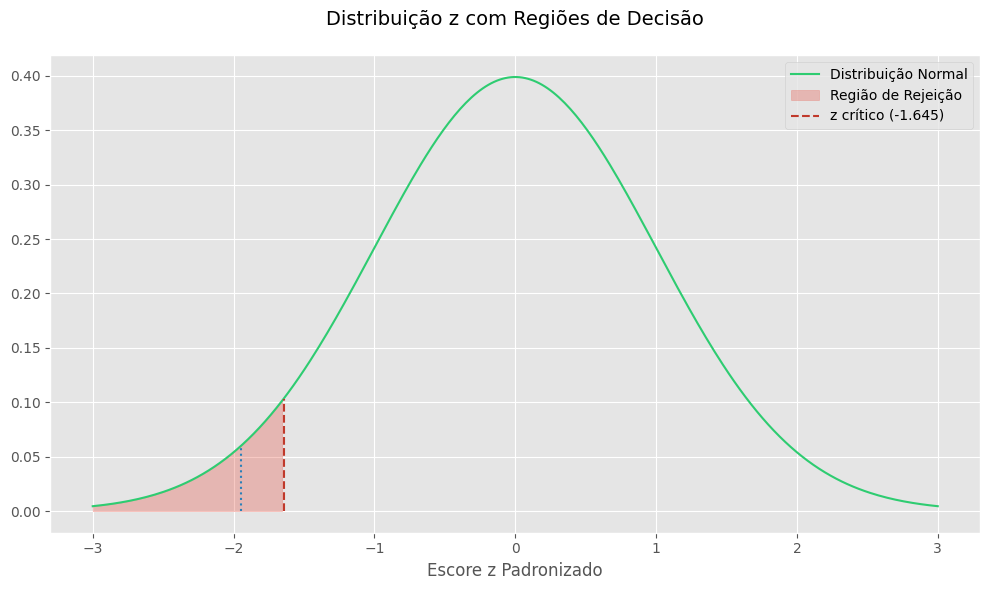

In [6]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,6))

# Curva normal
z_range = np.linspace(-3, 3, 300)
ax.plot(z_range, stats.norm.pdf(z_range), color='#2ecc71')

# Elementos de decisão
ax.fill_between(z_range, stats.norm.pdf(z_range), 
                where=(z_range <= z_critico), color='#e74c3c', alpha=0.3)
ax.vlines([z_critico, z], 0, stats.norm.pdf([z_critico, z]),
          colors=['#c0392b', '#2980b9'], linestyles=['--', ':'])

# Formatação
ax.set_title('Distribuição z com Regiões de Decisão\n', fontsize=14)
ax.set_xlabel('Escore z Padronizado', fontsize=12)
ax.legend(['Distribuição Normal', 'Região de Rejeição', 
          f'z crítico ({z_critico:.3f})', f'z amostral ({z:.3f})'])

plt.tight_layout()
plt.show()